In this section I’m going to implement the NAND model in Python.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [84]:
# NAND gate features
# note: x0 is a dummy variable for the bias term
#     x0  x1  x2
x = np.matrix([[1, 0, 0],                                  
               [1, 0, 1],                                 
               [1, 1, 0],                                  
               [1, 1, 1]])
# Desired outputs
y = np.matrix([[1],                                            
               [1],                                            
               [1],                                            
               [0]])
print('X size:', x[:,1].shape)
print('Y size:', y.shape)
print('X:\n',x)
print('Y:\n',y[:,0])

X size: (4, 1)
Y size: (4, 1)
X:
 [[1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]]
Y:
 [[1]
 [1]
 [1]
 [0]]


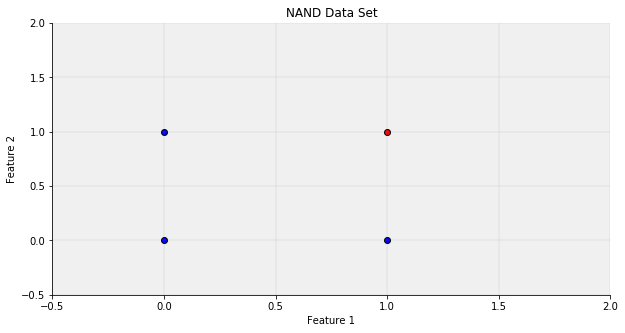

In [94]:
# scatter plot to visualize the two classes (red=1, blue=0)
fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter([x[:,1][y[:,0] == 1]], [x[:,2][y[:,0] == 1]] ,color='blue',edgecolors='black')
ax.scatter([x[:,1][y[:,0] == 0]], [x[:,2][y[:,0] == 0]] ,color='red' ,edgecolors='black')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax.set(xlim=(-0.5, 2), ylim=(-0.5, 2), xlabel='Feature 1', ylabel='Feature 2', title='NAND Data Set')
ax.set_facecolor('#f0f0f0')

In [95]:
# Training the Perceptron
# Inputs
# data:   feature data
# label:  outputs
# learning_rate: learning rate
#max_iter: number of iterations
def perceptron(data, label, max_iter, learning_rate):
    '''
    The perceptron classifier function.

    Args:
    data: train data with shape (m, 3), which means m samples and 
          each sample has 3 features.(1, feature 1, feature 2)
          
    label: train data's label with shape (m,1). 
           1 for digit number 1 and -1 for digit number 5.
           
    max_iter: max iteration numbers
    
    learning_rate: learning rate for weight update

    Returns:
        w: the seperater with shape (1, m). You must initilize it with w = np.zeros((1,d))
    '''
    n,m = data.shape
    
    # Initialize weights vector
    w = np.zeros((1,m)) 
    
    for t in range(max_iter):
        for i, x in enumerate(data):
            a = np.dot(data[i],w.T) # (w1)(x1)+(w2)(x2)+...+(wn)(xn)
            prediction = 1.0 if a >= 0.0 else 0 # sign(a)
            if(prediction != label[i]):
                if(label[i] == 0):
                    w = w + (learning_rate * -1 * data[i])
                else:
                    w = w + (learning_rate * 1 * data[i])
    return w

In [96]:
max_iter = 20
learning_rate = 0.981

w = perceptron(x, y, max_iter, learning_rate)
print('The weights are:',w)

The weights are: [[ 1.962 -1.962 -0.981]]


In [108]:
def show_result(data, label, w):
    '''
    This function is used for plot the test data with the separators and save it.

    Args:
    data: test features with shape (424, 2). The shape represents total 424 samples and 
          each sample has 2 features.
    label: test data's label with shape (424,1). 
           1 for digit number 1 and -1 for digit number 5.

    Returns:
    Do not return any arguments, just save the image you plot for your report.
    '''
    b  = w[0,0]
    wx = w[0,1]
    wy = w[0,2]
    
    x = np.linspace(-5,5,100)
    y = (-b-(x*wx))/wy
    
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(x, y, '-g')
    
    ax.scatter([data[:,1][label[:,0] == 1]], [data[:,2][label[:,0] == 1]] ,color='blue',edgecolors='black')
    ax.scatter([data[:,1][label[:,0] == 0]], [data[:,2][label[:,0] == 0]] ,color='red' ,edgecolors='black')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    ax.set(xlim=(-0.5, 2), ylim=(-0.5, 2), xlabel='Feature 1', ylabel='Feature 2', title='NAND Data Set')
    ax.set_facecolor('#f0f0f0')

In [119]:
def play_with_result(train_data, train_label):
    max_iter = 5
    learning_rate = 0.01
    w = perceptron(train_data, train_label, max_iter, learning_rate)
    show_result(train_data, train_label, w)
    print("play with result done!")

play with result done!


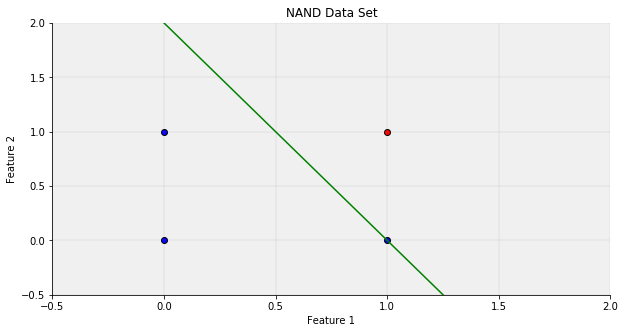

In [120]:
play_with_result(x, y)